# 3. Building a Stadium [10 pts]

#### by Roumen Guha, on Sunday, February 19th, 2017

A town council wishes to construct a small stadium in order to improve the services provided to the people living in the district. After the invitation to tender, a local construction company is awarded the contract and wishes to complete the task within the shortest possible time. All the major tasks are listed in the following table. Some tasks can only start after the completion of certain other tasks, as indicated by the "Predecessors" column.

<img src="3.png">

And now, the problems:

__a)__ What is the earliest possible date of completion for the construction? Note that the last two columns of the table are not relevant for this part of the problem.

In [17]:
tasks = [1:18;]

durations = Dict(zip(tasks, [2, 16, 9, 8, 10, 6, 2, 2, 9, 5, 3, 2, 1, 7, 4, 3, 9, 1]))
preds     = Dict(zip(tasks, ([],[1],[2],[2],[3],[4,5],[4],[6],[4,6],[4],[6],[9],[7],[2],[4,14],[8,11,14],[12],[17])))
maxReduc  = Dict(zip(tasks, [0, 3, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 3, 0]))
reducCost = Dict(zip(tasks, [0, 30, 26, 12, 17, 15, 8, 0, 42, 21, 18, 0, 0, 22, 12, 6, 16, 0]))
;

In [18]:
using JuMP

m = Model()

@variable(m, tstart[tasks] >= 0)

@constraint(m, link[i in tasks, j in preds[i]], tstart[i] >= tstart[j] + durations[j])

@objective(m, Min, tstart[18] + durations[18])

println(solve(m))
println(getvalue(tstart))
println("The project can complete, at earliest, in ", Int(getobjectivevalue(m)), " weeks")

Optimal
tstart: 1 dimensions:
[ 1] = 0.0
[ 2] = 2.0
[ 3] = 18.0
[ 4] = 18.0
[ 5] = 27.0
[ 6] = 37.0
[ 7] = 26.0
[ 8] = 43.0
[ 9] = 43.0
[10] = 26.0
[11] = 43.0
[12] = 52.0
[13] = 28.0
[14] = 18.0
[15] = 26.0
[16] = 46.0
[17] = 54.0
[18] = 63.0

The project can complete, at earliest, in 64 weeks


In [19]:
println(m)

Min tstart[18] + 1
Subject to
 tstart[2] - tstart[1] >= 2
 tstart[3] - tstart[2] >= 16
 tstart[4] - tstart[2] >= 16
 tstart[5] - tstart[3] >= 9
 tstart[6] - tstart[4] >= 8
 tstart[6] - tstart[5] >= 10
 tstart[7] - tstart[4] >= 8
 tstart[8] - tstart[6] >= 6
 tstart[9] - tstart[4] >= 8
 tstart[9] - tstart[6] >= 6
 tstart[10] - tstart[4] >= 8
 tstart[11] - tstart[6] >= 6
 tstart[12] - tstart[9] >= 9
 tstart[13] - tstart[7] >= 2
 tstart[14] - tstart[2] >= 16
 tstart[15] - tstart[4] >= 8
 tstart[15] - tstart[14] >= 7
 tstart[16] - tstart[8] >= 2
 tstart[16] - tstart[11] >= 3
 tstart[16] - tstart[14] >= 7
 tstart[17] - tstart[12] >= 2
 tstart[18] - tstart[17] >= 9
 tstart[i] >= 0 for all i in {1,2,..,17,18}



__b)__ For some of the tasks, the builder may employ additional workers and rent more equipment to cut down on the total time. The last two columns of the table show the maximum number of weeks that can be saved per task and the associated additional cost per week incurred by the extra work. Plot a trade-off curve that shows extra cost as a function of the number of weeks early we wish the stadium to be completed.

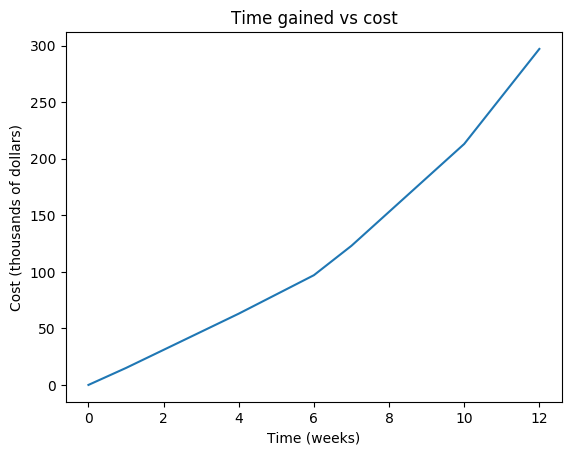

PyObject <matplotlib.text.Text object at 0x000000002DB3B0B8>

In [20]:
using JuMP, PyPlot

extraCost = [0, 15, 31, 47, 63, 80, 97, 123, 153, 183, 213, 255, 297]
reducedTime = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
using PyPlot
plot(reducedTime, extraCost)
title("Time gained vs cost")
xlabel("Time (weeks)")
ylabel("Cost (thousands of dollars)")


__c)__ The town council wants the builder to expedite the project. As an incentive, the council will pay a bonus of \$30k/week for each week the work finishes early. When will the project be completed if the builder is acting in a way that maximizes his profit?

In [21]:
using JuMP

m2 = Model()

@variable(m2, tstart[tasks] >= 0)
@variable(m2, reductions[tasks] >= 0)

for i in tasks
    # set each task to be limited by its max reductions
    @constraint(m2, reductions[i] <= maxReduc[i])
end

@constraint(m2, link[i in tasks, j in preds[i]], tstart[i] >= tstart[j] + durations[j] - reductions[j])

# profit is given by 30k * (difference between original predicted end date and actual end date) - costs incurred by builder from hiring additional employees and workers
@expression(m2, costs[i in tasks], sum(reductions[i]*reducCost[i]))
@objective(m2, Max, 30(64 - (tstart[18] + durations[18])) - sum(costs))

println(solve(m2))
println(getvalue(tstart))
println("If the builder acts to maximize profit, the project can complete, at earliest, in ", Int(getvalue(tstart[18]) + durations[18]), " weeks")
println("In the process, the builder will make ", Int(getobjectivevalue(m2)), "k more than he was previously making")

Optimal
tstart: 1 dimensions:
[ 1] = 0.0
[ 2] = 2.0
[ 3] = 18.0
[ 4] = 18.0
[ 5] = 26.0
[ 6] = 34.0
[ 7] = 26.0
[ 8] = 39.0
[ 9] = 39.0
[10] = 26.0
[11] = 39.0
[12] = 48.0
[13] = 28.0
[14] = 18.0
[15] = 26.0
[16] = 42.0
[17] = 50.0
[18] = 56.0

If the builder acts to maximize profit, the project can complete, at earliest, in 57 weeks
In the process, the builder will make 87k more than he was previously making


In [22]:
println(m2)

Max -30 tstart[18] - 30 reductions[2] - 26 reductions[3] - 12 reductions[4] - 17 reductions[5] - 15 reductions[6] - 8 reductions[7] - 42 reductions[9] - 21 reductions[10] - 18 reductions[11] - 22 reductions[14] - 12 reductions[15] - 6 reductions[16] - 16 reductions[17] + 1890
Subject to
 reductions[1] <= 0
 reductions[2] <= 3
 reductions[3] <= 1
 reductions[4] <= 2
 reductions[5] <= 2
 reductions[6] <= 1
 reductions[7] <= 1
 reductions[8] <= 0
 reductions[9] <= 2
 reductions[10] <= 1
 reductions[11] <= 1
 reductions[12] <= 0
 reductions[13] <= 0
 reductions[14] <= 2
 reductions[15] <= 2
 reductions[16] <= 1
 reductions[17] <= 3
 reductions[18] <= 0
 tstart[2] - tstart[1] + reductions[1] >= 2
 tstart[3] - tstart[2] + reductions[2] >= 16
 tstart[4] - tstart[2] + reductions[2] >= 16
 tstart[5] - tstart[3] + reductions[3] >= 9
 tstart[6] - tstart[4] + reductions[4] >= 8
 tstart[6] - tstart[5] + reductions[5] >= 10
 tstart[7] - tstart[4] + reductions[4] >= 8
 tstart[8] - tstart[6] + reducti

__Comment__: Thinking about this a little more, we can see that there is a way to actually reduce the time taken to construct this stadium by another 3 weeks. 

Task 2, which would originally have taken 16 weeks (as it does even in this solution) can be reduced by 3 weeks. However, it looks like the solution did not include it because the profit from those extra 3 weeks (30k per week) would have completely negated the profit earned from those 3 weeks (30k for every week the building finishes early). 